In [137]:
#Steps and Tasks:
1.	Exploratory Data Quality Report Reflecting the Following:  
1.	Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails. (2 Marks)
2.	Missing values analysis, Outlier detection, Duplicates check, Comment about if the zero values mean the null value here. (4 Marks)
3.	Using various plots, write the insights/observations about it. (6 Marks)
2.	Bi-variate analysis between the predictor variables and also between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves and write the insights/business understanding of the same. (8 marks)
3.	Feature Engineering techniques
1.	Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth. (3 Marks)
2.	Get the data model ready and do a train test split.
3.	Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree. (5 Marks)
4.	Creating the Model and Tuning It:
1.	Algorithms that you think will be suitable for this project.
2.	Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there and try to achieve 90% accuracy on testing set). (7 Marks)
3.	Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (8 Marks)
5.	Write the significance of the R2 score from the business perspective. Explain the effect of an increase/decrease in the R2 score on the business model. (4 Marks)
6.	Write down the inference about the data analysis and write the recommendations which can be beneficial to the business based on the whole analysis. Also, write the reason for your recommendation. (8 Marks)
7.	The marks for the score will be according to the following: testing score 90 -95 (5 marks), 85 - 90 (4 marks), 80 - 85( 3 marks), <80 (2 marks)


SyntaxError: invalid syntax (<ipython-input-137-328aa378d9f3>, line 2)

In [138]:

Objective:
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

Resources Available: 
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

Attribute Information:
Given are the variable name, variable type, the measurement unit, and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

 

Name	Data Type	Measurement	Description
1.	Cement (cement)	quantitative	kg in a m3 mixture	Input Variable
2.	Blast Furnace Slag (slag)	quantitative	kg in a m3 mixture	Input Variable
3.	Fly Ash (ash)	quantitative	kg in a m3 mixture	Input Variable
4.	Water(water)	quantitative	kg in a m3 mixture	Input Variable
5.	Superplasticizer (superplastic)	quantitative	kg in a m3 mixture	Input Variable
6.	Coarse Aggregate (coarseagg)	quantitative	kg in a m3 mixture	Input Variable
7.	Fine Aggregate (fineagg)	quantitative	kg in a m3 mixture	Input Variable
8.	Age(age)	quantitative	Day (1~365)	Input Variable
9.	Concrete compressive strength(strength)	quantitative	MPa	Output Variable
 


SyntaxError: invalid syntax (<ipython-input-138-af8d3a62b28e>, line 1)

In [377]:
import warnings
warnings.filterwarnings('ignore')

In [378]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

In [379]:
concrete_df = pd.read_csv("concrete.csv")
concrete_df.shape

(1030, 9)

In [380]:
concrete_df.info()
concrete_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00
strength,"1,030.00",35.82,16.71,2.33,23.71,34.45,46.14,82.60


In [381]:
# Description of datatypes no categories, positive skew for slag, ash and age
description_df = concrete_df.iloc[:,:-1]
description_df.info()
description_df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


,count,mean,std,min,25%,50%,75%,max
cement,"1,030.00",281.17,104.51,102.00,192.38,272.90,350.00,540.00
slag,"1,030.00",73.90,86.28,0.00,0.00,22.00,142.95,359.40
ash,"1,030.00",54.19,64.00,0.00,0.00,0.00,118.30,200.10
water,"1,030.00",181.57,21.35,121.80,164.90,185.00,192.00,247.00
superplastic,"1,030.00",6.20,5.97,0.00,0.00,6.40,10.20,32.20
coarseagg,"1,030.00",972.92,77.75,801.00,932.00,968.00,"1,029.40","1,145.00"
fineagg,"1,030.00",773.58,80.18,594.00,730.95,779.50,824.00,992.60
age,"1,030.00",45.66,63.17,1.00,7.00,28.00,56.00,365.00


In [382]:
#no null values or missing values
print(concrete_df.isnull().sum())

print("------")
# There is 0 values in certain columns, these values are acceptable
print(concrete_df.isin([0]).any().any())
print("------")
#no duplicates can be found
concrete_df.duplicated()
#Finding outliers
Q1 = concrete_df.quantile(0.25)
Q3 = concrete_df.quantile(0.75)

IQR = Q3 - Q1

lowerbound = Q1 - 1.5*IQR
upperbound = Q3 + 1.5*IQR
print("LowerBound")
print(lowerbound)
print("UpperBound")
print(upperbound)

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
------
True
------
LowerBound
cement          -44.06
slag           -214.42
ash            -177.45
water           124.25
superplastic    -15.30
coarseagg       785.90
fineagg         591.37
age             -66.50
strength         -9.93
dtype: float64
UpperBound
cement           586.44
slag             357.38
ash              295.75
water            232.65
superplastic      25.50
coarseagg      1,175.50
fineagg          963.58
age              129.50
strength          79.77
dtype: float64


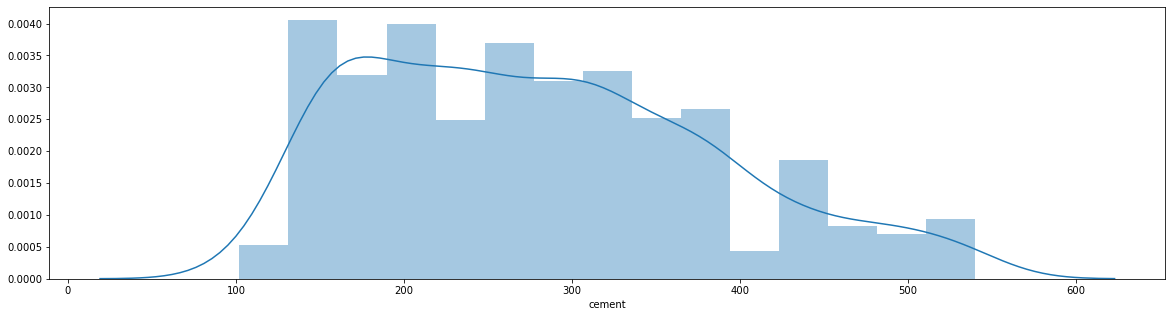

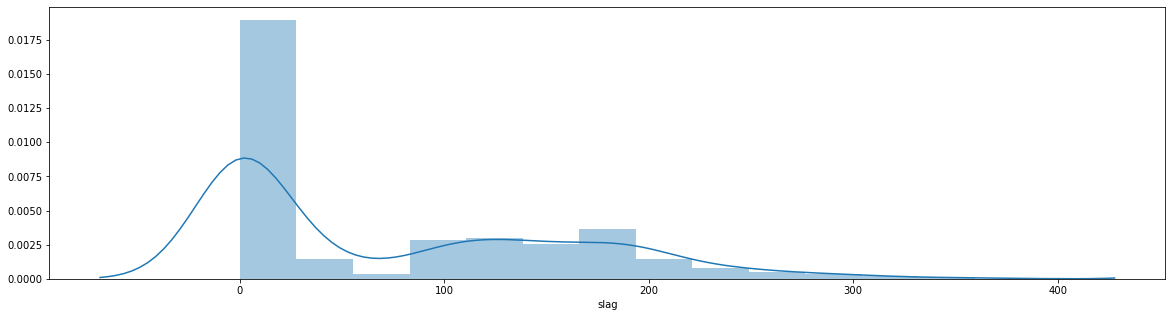

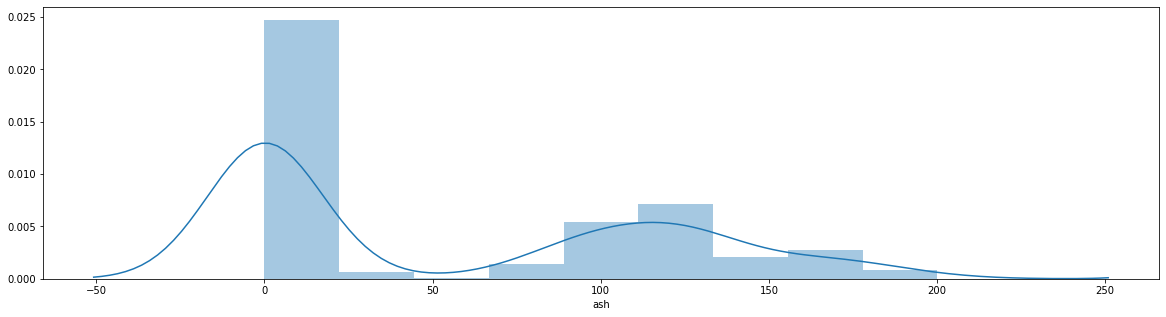

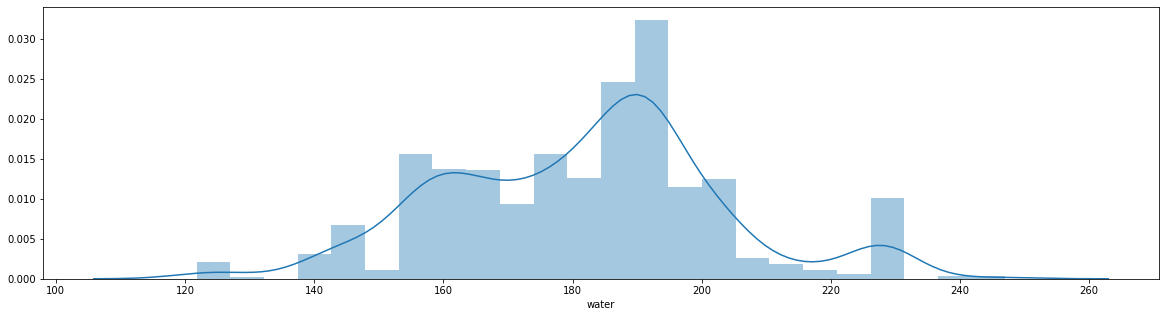

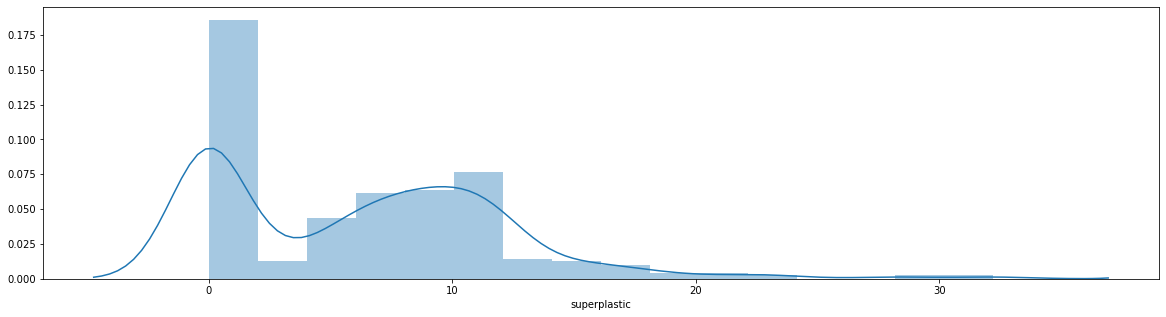

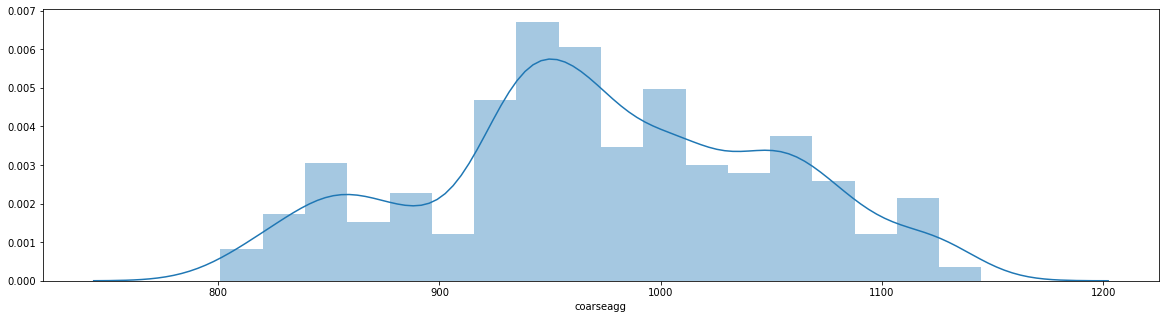

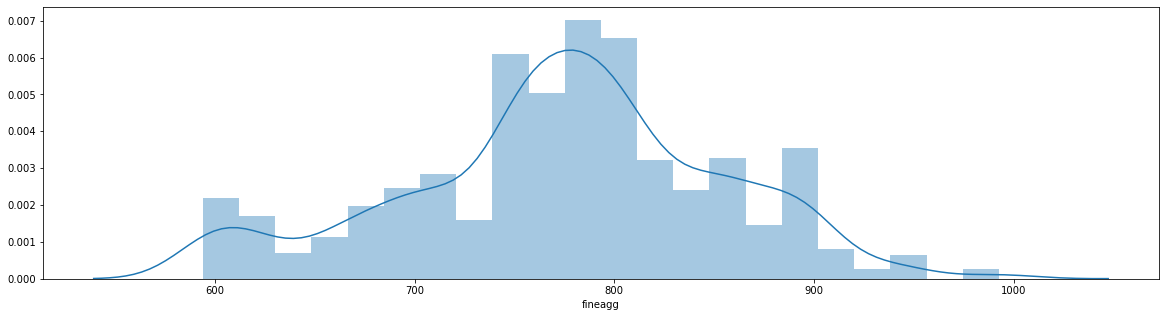

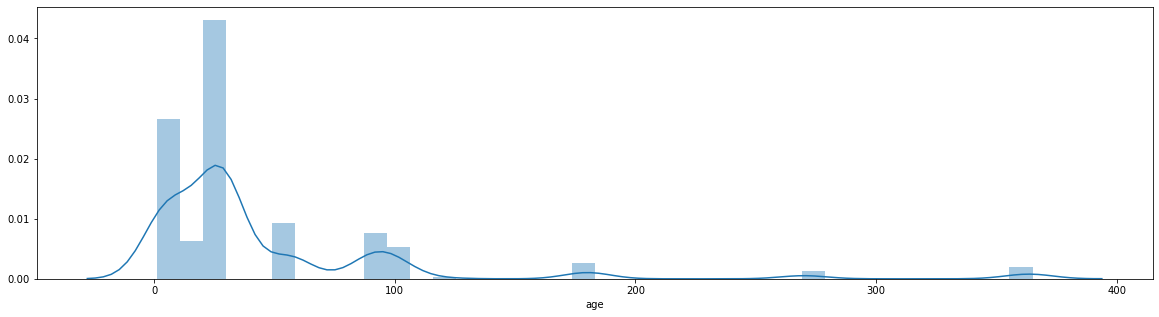

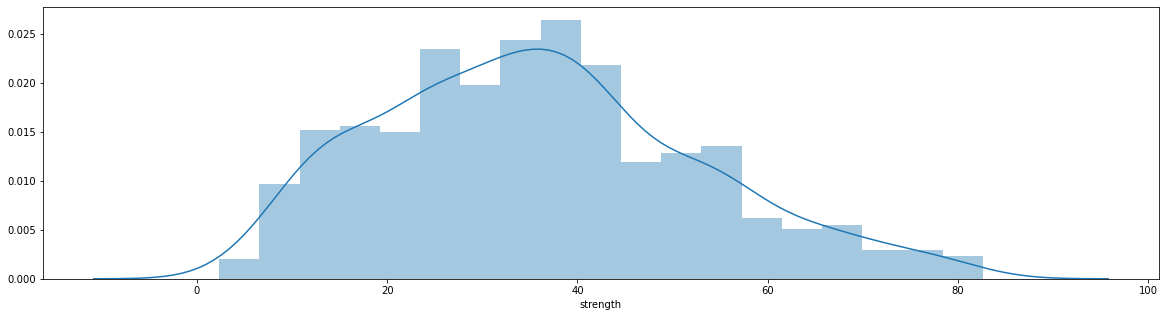

In [383]:
#Creating various plots as mentioned above extreme positive skewness in age, slag, ash and superplatic
def create_univariate_diagram(dframe):
    numvar = dframe.select_dtypes(include="number")
    numobj = dframe.select_dtypes(include="object")
    for column in numvar.columns:
        plt.figure(figsize=(20,5))
        sns.distplot(dframe[column])
        plt.show()
    for column in numobj.columns:
        plt.figure(figsize=(20,5))
        sns.countplotdframe([column])
        plt.show()
create_univariate_diagram(concrete_df)


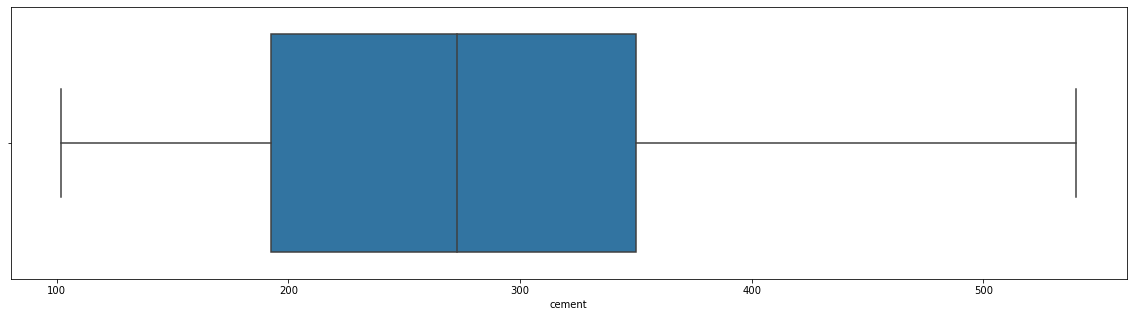

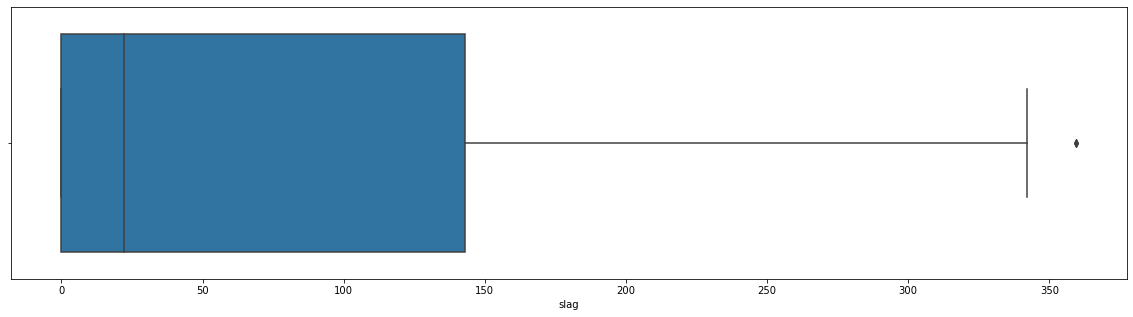

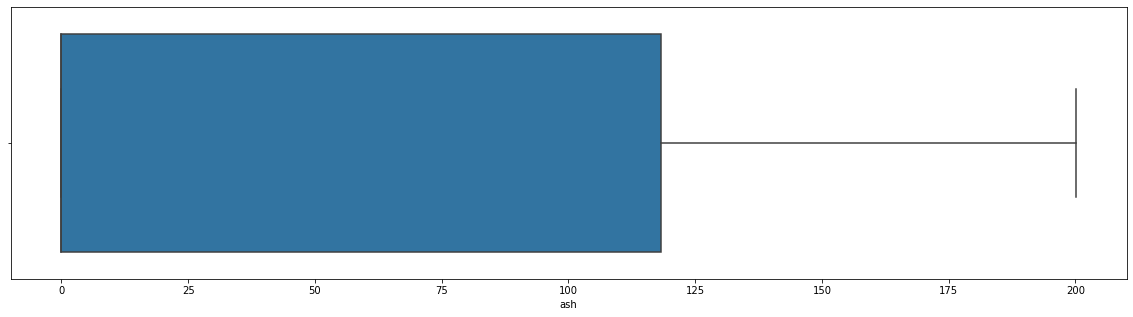

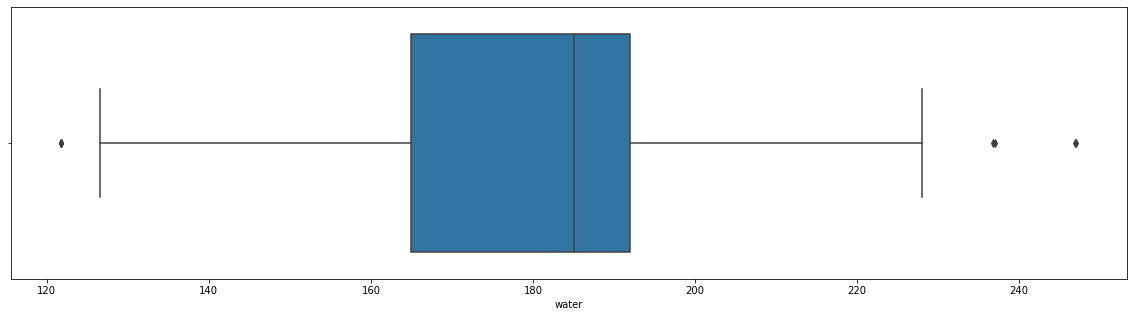

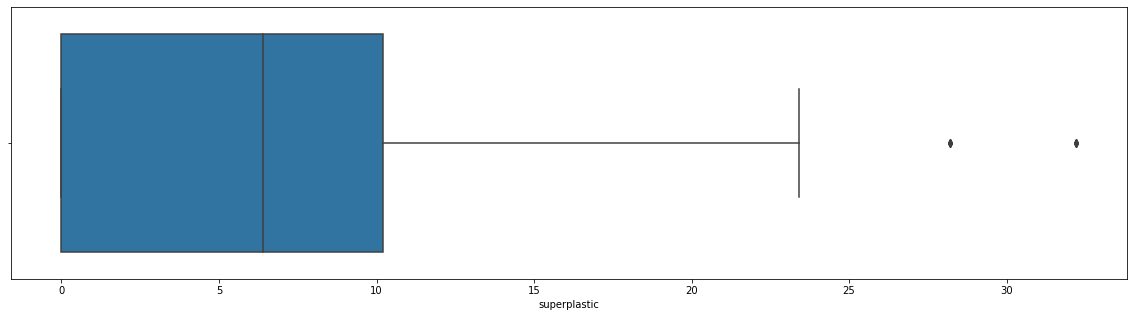

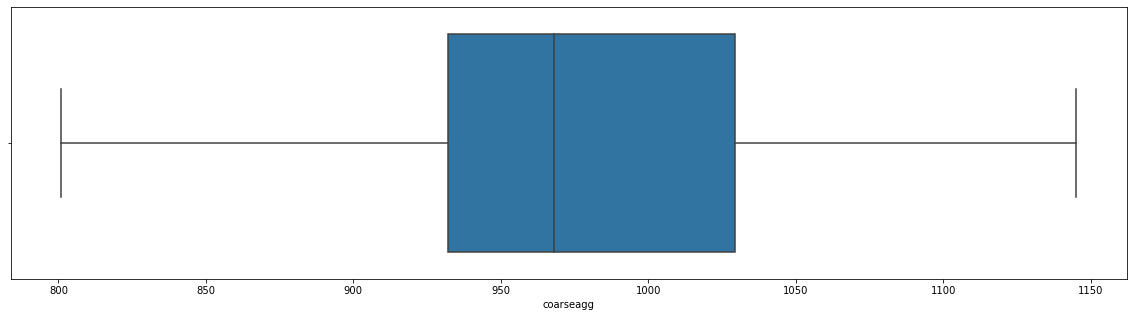

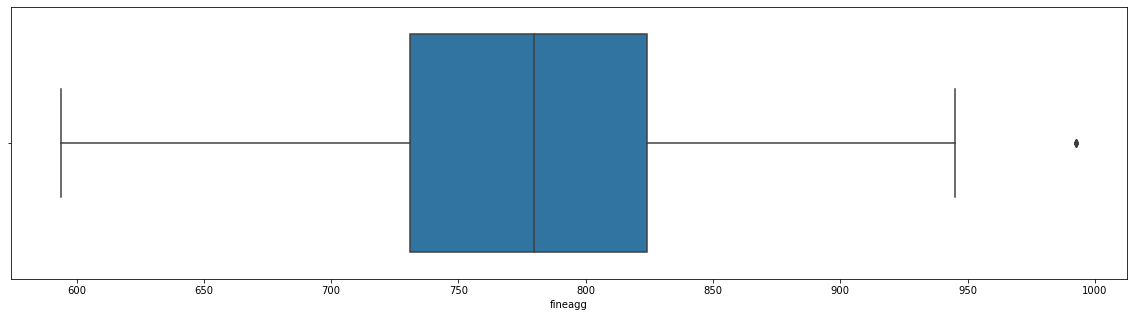

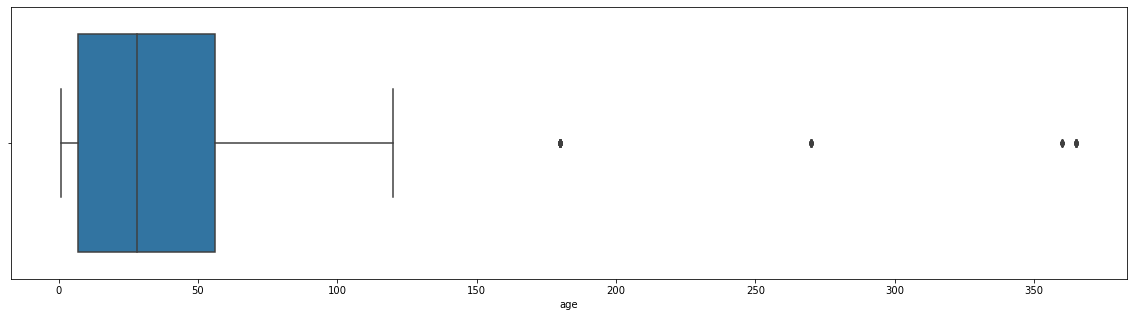

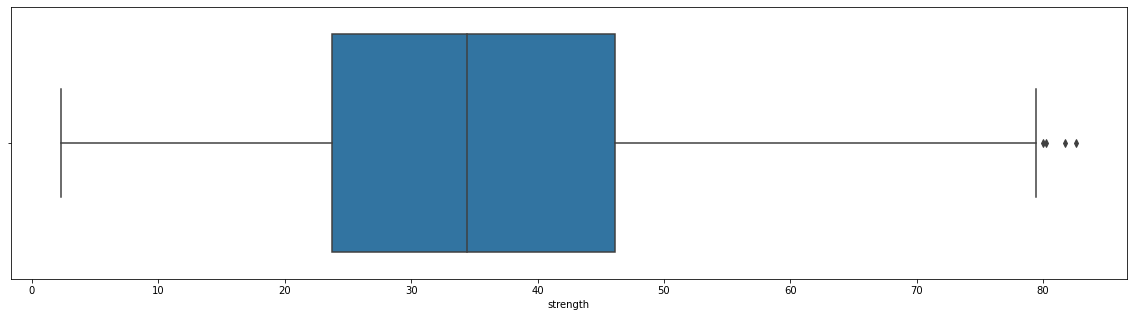

In [384]:
#Creating various plots very few outliers can be found, outliers in slag, water, superplatic, fienagg, age and strength 
def create_univariate_diagram(dframe):
    numvar = dframe.select_dtypes(include="number")
    numobj = dframe.select_dtypes(include="object")
    for column in numvar.columns:
        plt.figure(figsize=(20,5))
        sns.boxplot(dframe[column])
        plt.show()
    for column in numobj.columns:
        plt.figure(figsize=(20,5))
        sns.countplotdframe([column])
        plt.show()
create_univariate_diagram(concrete_df)

In [37]:
#Creating a Pairplot
sns.pairplot(concrete_df,hue="strength", diag_kind="kde")

KeyboardInterrupt: 

In [435]:
# No strong correlation between any of the features or features and target
cor = concrete_df.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor.stack()
cor[(cor < -.7 )| (cor > .7)]


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,nan,nan,nan,nan,nan,nan,nan,nan,nan
slag,nan,nan,nan,nan,nan,nan,nan,nan,nan
ash,nan,nan,nan,nan,nan,nan,nan,nan,nan
water,nan,nan,nan,nan,nan,nan,nan,nan,nan
superplastic,nan,nan,nan,nan,nan,nan,nan,nan,nan
coarseagg,nan,nan,nan,nan,nan,nan,nan,nan,nan
fineagg,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,nan,nan,nan,nan,nan,nan,nan,nan,nan
strength,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [437]:
# Moderate correlation between the below features and features and features and target, not strong enough to remove
cor = concrete_df.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor.stack()
cor[(cor < -.3)| (cor > .3)]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,nan,nan,nan,nan,nan,nan,nan,nan,nan
slag,nan,nan,nan,nan,nan,nan,nan,nan,nan
ash,-0.40,-0.32,nan,nan,nan,nan,nan,nan,nan
water,nan,nan,nan,nan,nan,nan,nan,nan,nan
superplastic,nan,nan,0.38,-0.66,nan,nan,nan,nan,nan
coarseagg,nan,nan,nan,nan,nan,nan,nan,nan,nan
fineagg,nan,nan,nan,-0.45,nan,nan,nan,nan,nan
age,nan,nan,nan,nan,nan,nan,nan,nan,nan
strength,0.50,nan,nan,nan,0.37,nan,nan,0.33,nan


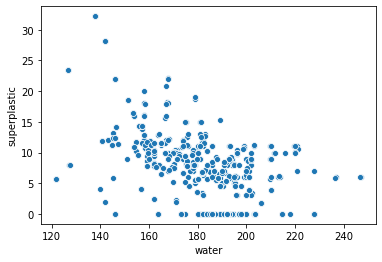

In [439]:
# moderate negative correlation
sns.scatterplot(concrete_df["water"],concrete_df['superplastic'])

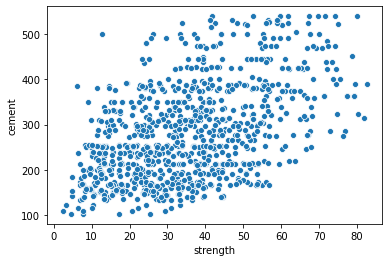

In [440]:
#moderate positive correlation
sns.scatterplot(concrete_df["strength"],concrete_df['cement'])

In [387]:
# All independent variabes in X
X = concrete_df.drop('strength', axis=1)

# All dependent variabes in y
y = concrete_df[['strength']]

In [388]:
#create the train split first followed by scalaing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


X_scaled_train = scaler.fit_transform(X_train)
X_scaled_train = pd.DataFrame(X_scaled_train, columns=X.columns)
X_scaled_test = scaler.fit_transform(X_test)
X_scaled_test = pd.DataFrame(X_scaled_test, columns=X.columns)
y_scaled_train = scaler.fit_transform(y_train)
y_scaled_train = pd.DataFrame(y_scaled_train, columns=y.columns)
y_scaled_test = scaler.fit_transform(y_test)
y_scaled_test = pd.DataFrame(y_scaled_test, columns=y.columns)


In [389]:
#Use Lasso to determine if features can be dropped
lasso = Lasso(alpha=0.2)
lasso.fit(X_scaled_train,y_scaled_train)
print ("Lasso model:", (lasso.coef_))





Lasso model: [ 0.28487678  0.00254358 -0.         -0.          0.15997786 -0.
 -0.          0.12139994]


In [390]:
#Dropped ash, water, fineagg and coarseagg can be dropped 
Xfeatures = concrete_df.drop(['strength','fineagg','ash', 'water'], axis=1)
yfeatures = concrete_df[['strength']]
X_train, X_test, y_train, y_test = train_test_split(Xfeatures, yfeatures, test_size=0.30, random_state=1)


X_scaled_train_red = scaler.fit_transform(X_train)
X_scaled_train_red = pd.DataFrame(X_scaled_train_red, columns=Xfeatures.columns)
X_scaled_test_red= scaler.fit_transform(X_test)
X_scaled_test_red = pd.DataFrame(X_scaled_test_red, columns=Xfeatures.columns)
y_scaled_train_red = scaler.fit_transform(y_train)
y_scaled_train_red = pd.DataFrame(y_scaled_train_red, columns=yfeatures.columns)
y_scaled_test_red = scaler.fit_transform(y_test)
y_scaled_test_red = pd.DataFrame(y_scaled_test_red, columns=yfeatures.columns)

In [391]:
# Use Linear Regression Model ... performs a little better in test, low score represents not a good fit
lregression_model = LinearRegression()
lregression_model.fit(X_scaled_train_red,y_scaled_train_red)
print(lregression_model.score(X_scaled_train_red,y_scaled_train_red))
print(lregression_model.score(X_scaled_test_red,y_scaled_test_red))

0.5489297079086803
0.5764478854133828


In [392]:
# Use AdaBoost Model ... performs better than Linear Regression
from sklearn.ensemble import AdaBoostRegressor
adaboost_model = AdaBoostRegressor()
adaboost_model.fit(X_scaled_train_red,y_scaled_train_red)
print(adaboost_model.score(X_scaled_train_red,y_scaled_train_red))
print(adaboost_model.score(X_scaled_test_red,y_scaled_test_red))

0.7849750303745671
0.7414092633046918


In [393]:
# Use RandomForest Model ... performs better than both above
from sklearn.ensemble import RandomForestRegressor
randomforest_model = RandomForestRegressor()
randomforest_model.fit(X_scaled_train_red,y_scaled_train_red)
print(randomforest_model.score(X_scaled_train_red,y_scaled_train_red))
print(randomforest_model.score(X_scaled_test_red,y_scaled_test_red))

0.9796895873460342
0.8676043328812593


In [394]:
#try different models -- LinerRegression
poly_linear_model2 = PolynomialFeatures(degree=2, include_bias=False)
poly3_features2 = poly_linear_model2.fit_transform(X_scaled_train_red)
#poly_linear_model.fit(X_scaled_train,y_train)
poly_regression_model2 = lregression_model.fit(poly3_features2, y_scaled_train_red)


print("Training Poly Score")
print(poly_regression_model2.score(poly3_features2,y_scaled_train_red))

Training Poly Score
0.7544538171111279


In [395]:
#try different models -- LinerRegression better with more features at third degree
poly_linear_model = PolynomialFeatures(degree=3, include_bias=False)
poly3_features = poly_linear_model.fit_transform(X_scaled_train_red)
#poly_linear_model.fit(X_scaled_train,y_train)
poly_regression_model = lregression_model.fit(poly3_features, y_scaled_train_red)


print("Training Poly Score")
print(poly_regression_model.score(poly3_features,y_scaled_train_red))




Training Poly Score
0.8426850086030554


In [409]:
#K Fold Cross Validation high value ranges from 90... to low 83... % 
from sklearn.ensemble import RandomForestRegressor
k = 10
kf = KFold(n_splits=k, random_state=1)
results = cross_val_score(RandomForestRegressor(), X_scaled_train_red, y_scaled_train_red, cv=kf)
print(results)
print("Mean", results.mean())
print("Standard Deviation", results.std())

[0.90828172 0.83811109 0.87578438 0.8701511  0.90882685 0.88215385
 0.89590869 0.92278515 0.8914541  0.84205067]
Mean 0.8835507599297658
Standard Deviation 0.02652142415800691


In [408]:
#K Fold Cross Validation
from sklearn.ensemble import AdaBoostRegressor
k = 10
kf = KFold(n_splits=k, random_state=1)
results = cross_val_score(AdaBoostRegressor(), X_scaled_train_red, y_scaled_train_red, cv=kf)
print(results)
print("Mean", results.mean())
print("Standard Deviation", results.std())

[0.77697054 0.72180837 0.71555333 0.68273145 0.74471327 0.740382
 0.71826359 0.75465698 0.78700541 0.79627368]
Mean 0.743835862660347
Standard Deviation 0.033932050465491685


In [399]:
#K Fold Cross Validation
from sklearn.model_selection import KFold , cross_val_score 
from sklearn.ensemble import RandomForestRegressor
k = 10
kf = KFold(n_splits=k, random_state=1)
results = cross_val_score(LinearRegression(), X_scaled_train_red, y_scaled_train_red, cv=kf)
print(results)
print("Mean", results.mean())
print("Standard Deviation", results.std())

[0.71394637 0.40456826 0.46618218 0.53204019 0.56002387 0.44259345
 0.58502526 0.52724158 0.57064385 0.55362483]
Mean 0.535588983704866
Standard Deviation 0.08192721191574243


In [400]:
#K Fold Cross Validation
from sklearn.model_selection import KFold , cross_val_score 
k = 10
kf1 = KFold(n_splits=k, random_state=1)
results1 = cross_val_score(poly_regression_model, X_scaled_train_red, y_scaled_train_red, cv=kf1)
print(results1)
print("Mean", results1.mean())
print("Standard Deviation", results1.std())

[0.71394637 0.40456826 0.46618218 0.53204019 0.56002387 0.44259345
 0.58502526 0.52724158 0.57064385 0.55362483]
Mean 0.535588983704866
Standard Deviation 0.08192721191574243


In [401]:
#K Fold Cross Validation
from sklearn.model_selection import KFold , cross_val_score 
k = 10
kf2 = KFold(n_splits=k, random_state=1)
results2 = cross_val_score(poly_regression_model2, X_scaled_train_red, y_scaled_train_red, cv=kf2)
print(results2)
print("Mean", results2.mean())
print("Standard Deviation", results2.std())

[0.71394637 0.40456826 0.46618218 0.53204019 0.56002387 0.44259345
 0.58502526 0.52724158 0.57064385 0.55362483]
Mean 0.535588983704866
Standard Deviation 0.08192721191574243


In [419]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [420]:

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [421]:

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_scaled_train_red, y_scaled_train_red)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [415]:
print(rf_random.best_params_)

{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}


In [434]:
rf1 = RandomForestRegressor(n_estimators = 1400, min_samples_split = 2, min_samples_leaf  = 1, max_features = 'auto', max_depth = 100, bootstrap = True)
rf1.fit(X_scaled_train_red,y_scaled_train_red)
print(rf1.score(X_scaled_train_red,y_scaled_train_red))
print(rf1.score(X_scaled_test_red,y_scaled_test_red))

0.9814007986286142
0.867839458211423


In [ ]:
#I chose the RandomForest Algorithm with the following tuning paramaters n_estimators = 1400, min_samples_split = 2, min_samples_leaf  = 1, max_features = 'auto', max_depth = 100, bootstrap = True

In [441]:
rf1.feature_importances_

array([0.3746736 , 0.1018388 , 0.12150903, 0.04938759, 0.35259098])

Text(0.5, 0, 'Random Forest Feature Importance')

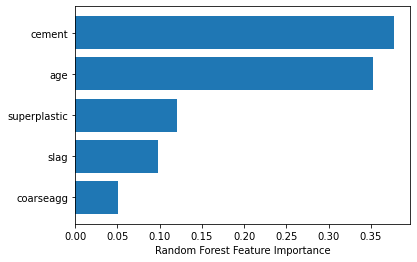

In [444]:
#Below please see the importance of the features in order
sorted_idx = rf1.feature_importances_.argsort()
plt.barh(X_scaled_train_red.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")